In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import libpysal as ps
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib.patches as mpatches
import os
#import rioxarray as rxr
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy import stats
import statsmodels.api as sm
import scipy.stats as sps

In [2]:
# Shenzhen Administrative Boundary
shp=gpd.read_file('data/深圳市_乡镇边界.shp')
#Metro data
point=pd.read_csv('data/metro.csv')

#Metro stations of No.2, 5, 6
point256=gpd.read_file('data/256_points.shp')
#Metro lines of No.2, 5, 6
line256=gpd.read_file('data/256_line.shp')

# accessibility facilities data
acc=pd.read_csv("data/无障碍设施4.csv")
lift=pd.read_csv("data/lift.csv")

#neighbour level data to district level data
dis=pd.read_csv('data/Town_district_list.csv')
# metro statio district
mad=pd.read_csv('data/metro_and_district.csv')

# merge data

Add district information into the accessibility facilities data

In [3]:
merged2=acc.merge(mad, on='车站')

In [4]:
merged2=merged2.drop_duplicates(subset=['车站'])

set crs of shp

In [5]:
shp = shp.to_crs("EPSG:4326")
line256=line256.to_crs("EPSG:4326")
point256=point256.to_crs("EPSG:4326")

Add geometry information into the accessibility facilities data

In [6]:
df  = merged2.merge(shp, on='Name', how='left')

Reflect the facility information of metro stations to their respective neighbour level

In [7]:
df_mean=df.groupby(['Name']).mean()

In [8]:
df_mean = df_mean.reset_index(level=0)

In [9]:
merged = shp.merge(df_mean, on='Name')

In [10]:
df_merged  = merged.merge(dis, on='Name', how='left')

Reflect the facility information of metro stations to their respective district level

In [11]:
df_merged_mean=df_merged.groupby(['district']).mean()
df_merged_mean = df_merged_mean.reset_index(level=0)
df_merged_mean

,district,OBJECTID_x,grade_x,Shape_Leng_x,Shape_Area_x,状态,accessible_lavatory,盲道,construction_phase,线路条数（包括城际铁路）,number_of_lines,盲道设计或施工原因,OBJECTID_y,grade_y,Shape_Leng_y,Shape_Area_y,disabled
0,光明,15.800,4.0,30382.539933,3.128024e+07,19.600000,1.000000,1.000000,3.000000,1.000000,1.000000,NaN,15.800,4.0,30382.539933,3.128024e+07,833.0
1,南山,17.125,3.0,26092.656931,2.638953e+07,9.207986,1.095139,0.928299,2.264931,1.145139,1.145139,0.666667,17.125,3.0,26092.656931,2.638953e+07,2235.0
2,宝安,36.875,4.0,41150.723533,4.581851e+07,16.725694,1.052083,0.986111,2.655258,1.260913,1.135913,1.000000,36.875,4.0,41150.723533,4.581851e+07,2786.0
3,盐田,45.500,4.0,22206.037953,3.122053e+07,4.250000,0.000000,1.000000,3.000000,1.000000,1.000000,NaN,45.500,4.0,22206.037953,3.122053e+07,370.0
4,福田,53.500,4.0,13996.331030,8.754323e+06,13.252778,1.155556,0.988194,2.673611,1.377778,1.365278,0.500000,53.500,4.0,13996.331030,8.754323e+06,3331.0
5,罗湖,63.500,4.0,13757.307736,9.255651e+06,19.482619,0.885714,0.927381,2.482143,1.355952,1.255952,0.666667,63.500,4.0,13757.307736,9.255651e+06,2408.0
6,龙华,71.500,4.0,34866.718260,3.425898e+07,13.166667,1.112698,1.000000,2.771429,1.136508,1.112698,NaN,71.500,4.0,34866.718260,3.425898e+07,858.0
7,龙岗,80.500,4.0,36638.560241,3.916686e+07,23.533333,0.511667,0.970833,2.258333,1.095000,1.041667,1.000000,80.500,4.0,36638.560241,3.916686e+07,2935.0


In [12]:
df_merged2  = df_merged.merge(df_merged_mean, on='district', how='left')

## Tactile ground surface indicator（TGSI）

Average completeness of blind lanes for each metro station in the same neighbour

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


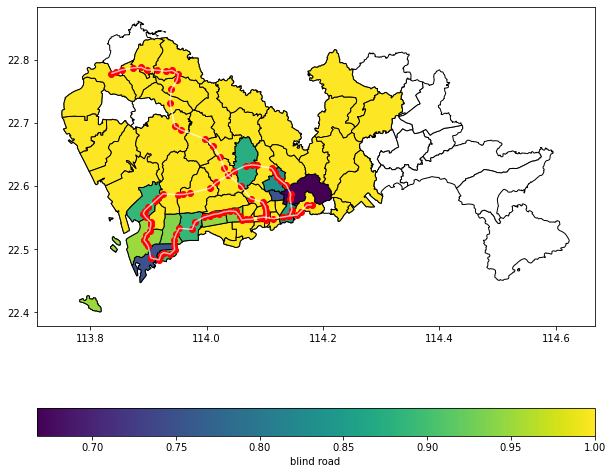

In [13]:
ax = shp.plot(column = 'Layer', color='white',figsize=(10,10),edgecolor='black') 
me=merged.plot("盲道", ax=ax,legend=True,edgecolor='black',legend_kwds={'label': "blind road",'orientation': "horizontal"})
point256=point256.plot(column = 'Layer', color='red',ax=me)
line=line256.plot(column = 'Layer', color='white',alpha=0.7,ax=point256)

## Accessible toilet

Average number of accessible lavatory per metro station in the neighbour

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

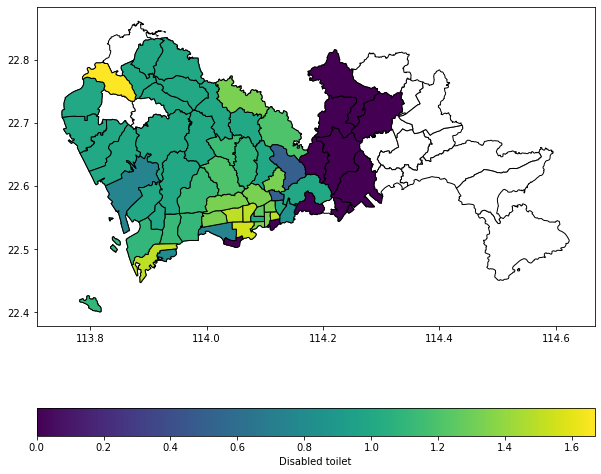

In [14]:
ax = shp.plot(column = 'Layer', color='white',figsize=(10,10),edgecolor='black') 
merged.plot("accessible_lavatory", ax=ax,legend=True,edgecolor='black',legend_kwds={'label': "Disabled toilet",'orientation': "horizontal"})

In [16]:
# number of lines VS number of accessible lavatory
df_mean_lava=df.groupby(['number_of_lines']).mean()
df_mean_lava

,状态,accessible_lavatory,盲道,construction_phase,线路条数（包括城际铁路）,盲道设计或施工原因,OBJECTID,grade,Shape_Leng,Shape_Area
number_of_lines,,,,,,,,,,
1,15.561111,0.822335,0.959391,2.558376,1.035533,0.75,48.461929,3.695431,26962.877774,2.700155e+07
2,14.235294,1.833333,0.958333,2.472222,2.027778,1.00,51.500000,3.777778,21120.784743,1.814308e+07
3,10.333333,2.500000,1.000000,1.750000,3.250000,NaN,44.750000,4.000000,19098.066185,1.696734e+07
4,11.000000,4.000000,1.000000,1.000000,4.000000,NaN,57.000000,4.000000,14888.353337,1.118866e+07


## Lift

In [17]:
merged = point.merge(lift, on='车站')

crs = {'init': 'epsg:4326'}
shp = shp.to_crs("EPSG:4326")
geometry = [Point(xy) for xy in zip(merged['lng'], merged['lat'])]
gdf = gpd.GeoDataFrame(merged, crs=crs, geometry=geometry)
gdf = gdf.to_crs("EPSG:4326")

pointInPolys = gpd.tools.sjoin(gdf, shp, how='left')
pointInPolys2 = pointInPolys.drop_duplicates(subset='车站')
PIP=pointInPolys2.dropna(subset=['Name'])

df_mean=PIP.groupby(['Name']).mean()
df_mean = df_mean.reset_index(level=0)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

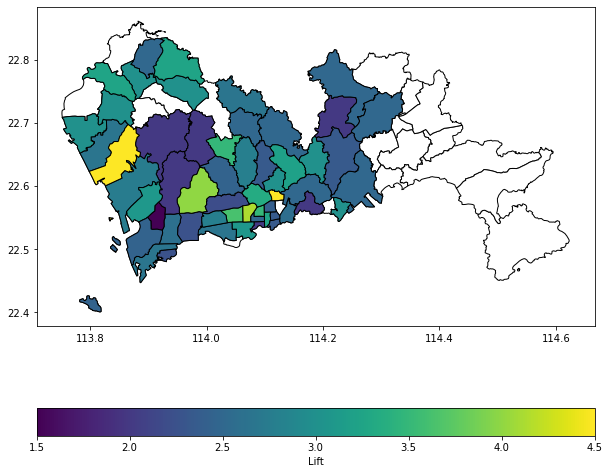

In [18]:
merged = shp.merge(df_mean, on='Name')

ax = shp.plot(column = 'Layer', color='white',figsize=(10,10),edgecolor='black') 
merged.plot("站厅至站外垂直电梯位置", ax=ax,legend=True,edgecolor='black',legend_kwds={'label': "Lift",'orientation': "horizontal"})